In [1]:
## https://elife-asu.github.io/PyInform/timeseries.html#module-pyinform.mutualinfo
# !pip install pyinform
# https://github.com/danielgreenfeld3/XIC/blob/master/hsic.py

In [2]:
# !pip3 install torch
# !pip3 install torchvision

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
def pairwise_distances(x):
    #x should be two dimensional
    instances_norm = np.sum(x**2,-1).reshape((-1,1))
    return -2*np.matmul(x,x.T) + instances_norm + instances_norm.T

def GaussianKernelMatrix(x, sigma=1):
    pairwise_distances_ = pairwise_distances(x)
    return np.exp(-pairwise_distances_ /sigma)

def HSIC(x, y, s_x=1, s_y=1):
    m,_ = x.shape #batch size
    K = GaussianKernelMatrix(x,s_x)
    L = GaussianKernelMatrix(y,s_y)
    H = np.eye(m) - 1.0/m * np.ones((m,m))
    HSIC = np.trace(np.matmul(L,np.matmul(H,np.matmul(K,H))))/((m-1)**2)
    return HSIC

In [5]:
data_file = 'Micro_wires_v36_Total.xlsx'
data_df = pd.read_excel(data_file, sheet_name='Data')
data_df

,Unnamed: 0,Electrode,Conventional,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,NaN,Finger,Thumb,NaN,NaN,NaN,Index,NaN,NaN,NaN,...,NaN,NaN,Ring,NaN,NaN,NaN,Little,NaN,NaN,NaN
1,NaN,Under,No strain,NaN,Strain,NaN,No strain,NaN,Strain,NaN,...,Strain,NaN,No strain,NaN,Strain,NaN,No strain,NaN,Strain,NaN
2,Time [ms],Signal source,Electrode,Dataglove,Electrode,Dataglove,Electrode,Dataglove,Electrode,Dataglove,...,Electrode,Dataglove,Electrode,Dataglove,Electrode,Dataglove,Electrode,Dataglove,Electrode,Dataglove
3,0,NaN,25,909,456,976,14,945,17,943,...,41.01789,941,9.32333,963,430.04729,957.92818,37.85448,947,36,946
4,48,NaN,20.6131,909.6904,375.47274,976,14,945,17,943,...,36.12875,941.58086,14.12065,963,549.57276,954.71737,37.26202,947,36,946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,NaN,NaN,23.56612,918,871.27155,953.75216,14,943,17,944,...,14,963,NaN,NaN,NaN,NaN,35.44233,946,36,946.05395
586,NaN,NaN,19.69816,918,870.42273,956.20036,14,943,17,944.10912,...,14,963,NaN,NaN,NaN,NaN,35,946,36,946
587,NaN,NaN,24.96243,918,852.01767,960.19025,14,943,17,944.47184,...,14,963.3608,NaN,NaN,NaN,NaN,35,946,36,946
588,NaN,NaN,25,918.51312,816.19445,964.18013,14,943,17,944.83456,...,14,963.92508,NaN,NaN,NaN,NaN,35.25877,946,36,946


In [6]:
columns = ['e_no_strain', 'd_no_strain', 'e_strain', 'd_strain']
fingers = ['thumb', 'index', 'middle', 'ring', 'little']

In [7]:
col_start = 2
conventional_emg_df = {}
for cf, f in enumerate(fingers):
  conventional_emg_df[f] = data_df.iloc[3:,col_start+len(columns)*cf:col_start+len(columns)*(cf+1)].astype('float')
  conventional_emg_df[f].columns = columns
display(conventional_emg_df['thumb'])

col_start = 22
cfee_emg_df = {}
for cf, f in enumerate(fingers):
  cfee_emg_df[f] = data_df.iloc[3:,col_start+len(columns)*cf:col_start+len(columns)*(cf+1)].astype('float')
  cfee_emg_df[f].columns = columns
display(cfee_emg_df['thumb'])

,e_no_strain,d_no_strain,e_strain,d_strain
3,25.00000,909.00000,456.00000,976.00000
4,20.61310,909.69040,375.47274,976.00000
5,23.77379,910.00000,294.94547,976.00000
6,25.00000,910.05480,401.71984,976.00000
7,22.34825,910.74519,562.20338,976.00000
...,...,...,...,...
585,23.56612,918.00000,871.27155,953.75216
586,19.69816,918.00000,870.42273,956.20036
587,24.96243,918.00000,852.01767,960.19025
588,25.00000,918.51312,816.19445,964.18013


,e_no_strain,d_no_strain,e_strain,d_strain
3,505.00000,931.00000,22.00000,1132.0000
4,322.10499,930.08262,21.08035,1132.0000
5,232.46838,929.16525,20.16070,1132.0000
6,500.92257,921.22802,20.00000,1132.0000
7,648.74496,911.74847,20.00000,1132.0000
...,...,...,...,...
585,646.00000,891.37152,252.42504,1120.4001
586,635.00106,876.47509,105.27772,1132.0000
587,585.51903,871.05665,51.39845,1132.0000
588,465.06756,875.18484,32.00716,1132.0000


In [8]:
conventional_emg_results = {}
for f in fingers:
  time_series = conventional_emg_df[f].iloc[:,0:2].dropna()
  t1 = StandardScaler().fit_transform(np.atleast_2d(time_series.iloc[:,0]).T)
  t2 = StandardScaler().fit_transform(np.atleast_2d(time_series.iloc[:,1]).T)
  hsic = HSIC(t1,t2)
  key = f + '_no_strain'
  conventional_emg_results[key] = hsic
  print(key, hsic)

  time_series = conventional_emg_df[f].iloc[:,2:4].dropna()
  t1 = StandardScaler().fit_transform(np.atleast_2d(time_series.iloc[:,0]).T)
  t2 = StandardScaler().fit_transform(np.atleast_2d(time_series.iloc[:,1]).T)
  hsic = HSIC(t1,t2)
  key = f + '_strain'
  conventional_emg_results[key] = hsic
  print(key, hsic)

thumb_no_strain 0.012330969379090199
thumb_strain 0.002103253089624044
index_no_strain 0.011861443279181415
index_strain 2.2100918043631192e-05
middle_no_strain 0.0052487144393364455
middle_strain 0.00038667070159477266
ring_no_strain 0.00449890038965703
ring_strain 0.0001382765851634662
little_no_strain 0.006514378083371933
little_strain 0.0007047833869627942


In [9]:
cfee_emg_results = {}
for f in fingers:
  time_series = cfee_emg_df[f].iloc[:,0:2].dropna()
  t1 = StandardScaler().fit_transform(np.atleast_2d(time_series.iloc[:,0]).T)
  t2 = StandardScaler().fit_transform(np.atleast_2d(time_series.iloc[:,1]).T)
  hsic = HSIC(t1,t2)
  key = f + '_no_strain'
  cfee_emg_results[key] = hsic
  print(key, hsic)

  time_series = cfee_emg_df[f].iloc[:,2:4].dropna()
  t1 = StandardScaler().fit_transform(np.atleast_2d(time_series.iloc[:,0]).T)
  t2 = StandardScaler().fit_transform(np.atleast_2d(time_series.iloc[:,1]).T)
  hsic = HSIC(t1,t2)
  key = f + '_strain'
  cfee_emg_results[key] = hsic
  print(key, hsic)

thumb_no_strain 0.0347558294606273
thumb_strain 0.03801853185488668
index_no_strain 0.03622589526085549
index_strain 0.04000582806107726
middle_no_strain 0.036954581614372595
middle_strain 0.042137241108429375
ring_no_strain 0.03273464720756006
ring_strain 0.033975049755050224
little_no_strain 0.027694550268673915
little_strain 0.03656041623168416


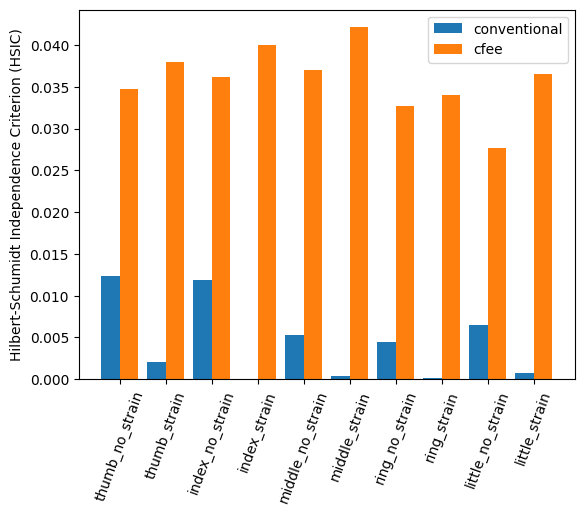

In [10]:
keys = conventional_emg_results.keys()
index = np.arange(len(keys))
bar_width = 0.4
fig, ax = plt.subplots()
conventional = ax.bar(index, [conventional_emg_results[k] for k in keys], bar_width, label='conventional')
cfee = ax.bar(index+bar_width, [cfee_emg_results[k] for k in keys], bar_width, label='cfee')


ax.set_ylabel('Hilbert-Schumidt Independence Criterion (HSIC)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(keys, rotation=70)
ax.legend()
plt.show()